In [2]:
import torch

In [3]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data = torch.hstack([random0, random5])
class2_data = torch.hstack([random5, random0])
class1_label = torch.ones(int(N/2),1)
class2_label = torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

# case 2
# N=100
# radius1=0.3+0.05*torch.randn(int(N/2),1)
# radius2=1+0.01*torch.randn(int(N/2),1)
# theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
# theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
# class1_data = torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
# class2_data = torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
# class1_label = torch.ones(int(N/2),1)
# class2_label = torch.zeros(int(N/2),1)
# X=torch.vstack([class1_data,class2_data])
# y=torch.vstack([class1_label, class2_label])

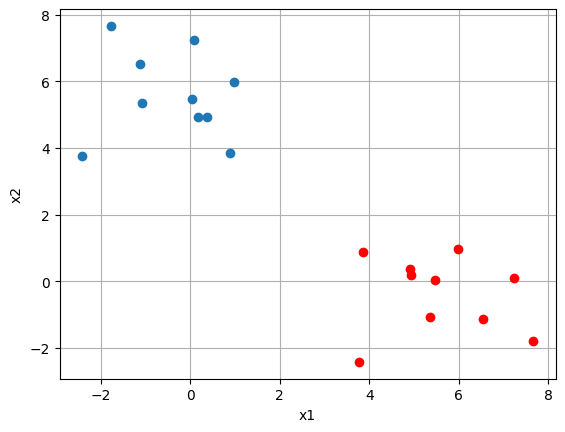

In [4]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0], class1_data[:,1],'o')
plt.plot(class2_data[:,0], class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [11]:
from torch import nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()

    # case 1, plain
    self.linear =nn.Sequential(nn.Linear(2,100), # 10, 100, 1000, 10000으로 바꿔보면서 확인
                              nn.Sigmoid(),
                              nn.Linear(100,1), # node가 많을수록 좋게 나옴
                              nn.Sigmoid())
    # case 1, very simple
    # self.linear = nn.Sequential(nn.Linear(2,1), # 아주 simple한 것도 오히려 괜찮다.
    #                            nn.Sigmoid())

    # # case 1, deep
    # self.linear = nn.Sequential(nn.Linear(2,100), # deep 하면 오래 걸림
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,100),
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,100),
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,1),
    #                             nn.Sigmoid())

    # # case 2, plain
    # self.linear = nn.Sequential(nn.Linear(2,100),
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,1),
    #                             nn.Sigmoid())

    # # case 2, very simple
    # self.linear = nn.Sequential(nn.Linear(2,1), # 선형 분류만 가능해서 불가
    #                             nn.Sigmoid())

    # # case 2, deep
    # self.linear = nn.Sequential(nn.Linear(2,100), # LR을 줄이니까 수렴
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,100),
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,100),
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,1),
    #                             nn.Sigmoid())

  def forward(self, x):
    x = self.linear(x)
    return x

In [15]:
model =MLP()
print(model)
print(model(torch.randn(5,2)).shape)# 2개 값으로 이루어진 좌표값 (x1,x2)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


## STEP 3. 모델 학습 시키기

In [16]:
from torch import optim

LR = 1e-1 # case 1
# LR = 1e-2 # case 2, plain 에서 노드 천 개, deep
# LR = 1e-4 # case 2, very deep relu
EPOCH = 100 # case 1
#EPOCH = 500 # case 2, plain 에서 노드 천 개, deep very deep relu

optimizer = optim.SGD(model.parameters(), lr=LR)
#optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep
# optimizer = optim.Adam(model.parameters(), lr=LR, eps=0, betas=(0.9,0.99))
# optimizer = optim.Adam(model.parameters(), lr=LR, EPS=1e-12, betas=())
criterion = nn.BCELoss()

loss_history=[]
grad_history=[]
update_size_history=[]

model.train() # train mode로 전환
for ep in range(EPOCH):
  # inference
  y_hat = model(X)
  # loss
  loss = criterion(y_hat, y)
  # prev weights
  prev = model.linear[0].weight.detach().clone()
  # update
  optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
  loss.backward() # backpropagation
  optimizer.step() # weight update
  # print loss
  loss_history += [loss.item()]
  print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
  print("-"*20)

Epoch: 1, train loss: 0.5956
--------------------
Epoch: 2, train loss: 0.4821
--------------------
Epoch: 3, train loss: 0.4003
--------------------
Epoch: 4, train loss: 0.3398
--------------------
Epoch: 5, train loss: 0.2938
--------------------
Epoch: 6, train loss: 0.2580
--------------------
Epoch: 7, train loss: 0.2296
--------------------
Epoch: 8, train loss: 0.2064
--------------------
Epoch: 9, train loss: 0.1874
--------------------
Epoch: 10, train loss: 0.1714
--------------------
Epoch: 11, train loss: 0.1578
--------------------
Epoch: 12, train loss: 0.1462
--------------------
Epoch: 13, train loss: 0.1361
--------------------
Epoch: 14, train loss: 0.1273
--------------------
Epoch: 15, train loss: 0.1195
--------------------
Epoch: 16, train loss: 0.1126
--------------------
Epoch: 17, train loss: 0.1065
--------------------
Epoch: 18, train loss: 0.1009
--------------------
Epoch: 19, train loss: 0.0959
--------------------
Epoch: 20, train loss: 0.0914
----------

In [17]:
print(criterion(y_hat, y))
print(torch.sum(-torch.log(y_hat**y * (1-y_hat)**(1-y)))/N)
print(criterion(torch.tensor([0.]),torch.tensor([1.]))) # 100 이 최대다..!

tensor(0.0187, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0187, grad_fn=<DivBackward0>)
tensor(100.)


Text(0, 0.5, 'Loss')

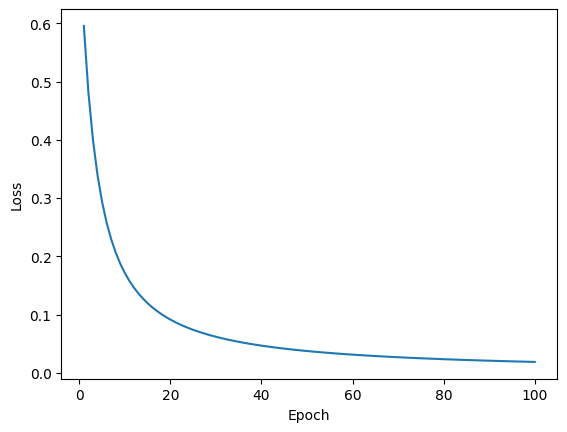

In [18]:
plt.plot(range(1,EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")

## STEP 4. 모델 테스트하기

Text(0.5, 0.5, 'x2')

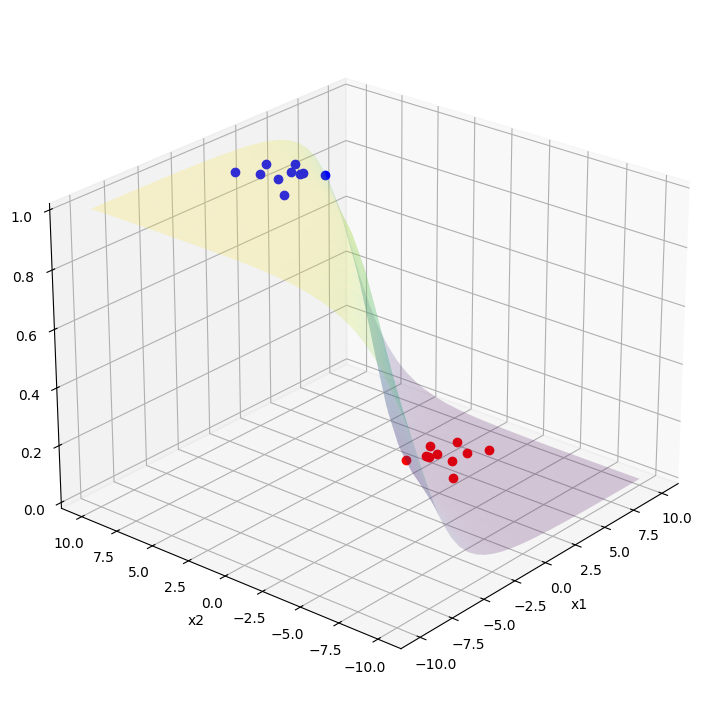

In [20]:
x1_test = torch.linspace(-10,10,30) # case 1
x2_test = torch.linspace(-10,10,30) # case 1
#x1_test = torch.linspace(-2,2,30) # case 2
#x2_test = torch.linspace(-2,2,30) # case 2
X1_test, X2_test=torch.meshgrid(x1_test,x2_test)
X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

model.eval() # test mode로 해결
with torch.no_grad():
  y_hat = model(X_test)
# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다.
Y_hat = y_hat.squeeze()
plt.figure(figsize=[10,9])
ax = plt.axes(projection='3d')
ax.view_init(elev=25, azim=-140)
ax.plot_surface(X1_test, X2_test, Y_hat.numpy(), cmap="viridis",alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")